# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

79


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=metric"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

Beginning Data Retrieval
------------------------------
Processing record 0 | Cayenne
Data visual: 1

Processing record 1 | Ribeira grande
Data visual: 2

Processing record 2 | Mitsamiouli
Data visual: 3

Processing record 3 | Meulaboh
Data visual: 4

Processing record 4 | Lagoa
Data visual: 5

Processing record 5 | Cap malheureux
Data visual: 6

Processing record 6 | Mildura
Data visual: 7

Processing record 7 | Khatanga
Data visual: 8

Processing record 8 | Victoria
Data visual: 9

Processing record 9 | Rikitea
Data visual: 10

Processing record 10 | Hithadhoo
Data visual: 11

Processing record 11 | Mataura
Data visual: 12

Processing record 12 | Esperance
Data visual: 13

Processing record 13 | Dikson
Data visual: 14

Processing record 14 | New norfolk
Data visual: 15

Processing record 15 | Norman wells
Data visual: 16

No data found for Tsihombe. Skipping...
Data visual: 17

Processing record 17 | Qaanaaq
Data visual: 18

Processing record 18 | Denpasar
Data visual: 19

Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cayenne,4.93,-52.33,33,49,13,6.7,GF,1602695270
1,ribeira grande,38.52,-28.7,22,78,75,5.1,PT,1602695371
2,mitsamiouli,-11.38,43.28,25.99,81,85,1.75,KM,1602695371
3,meulaboh,4.14,96.13,26.41,77,100,1.52,ID,1602695372
4,lagoa,39.05,-27.98,20.35,74,0,2.91,PT,1602695372
...,...,...,...,...,...,...,...,...,...
73,upernavik,72.79,-56.15,0.14,90,0,1.08,GL,1602695393
75,arica,-18.48,-70.3,20.56,68,90,4.1,CL,1602695394
76,vila velha,-20.33,-40.29,30,70,75,7.2,BR,1602695127
77,iquique,-20.22,-70.14,19,59,40,5.7,CL,1602695394


In [32]:
over_100 = city_data.loc[city_data["Humidity"] < 50]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cayenne,4.93,-52.33,33,49,13,6.7,GF,1602695270
6,mildura,-34.2,142.15,21,43,46,3.1,AU,1602695373
19,abu zabad,12.35,29.25,31.5,29,15,2.09,SD,1602695377
25,seoul,37.57,126.98,9,39,75,1.98,KR,1602695090
31,gazli,40.13,63.45,13.83,33,0,4.41,UZ,1602695380
54,albany,42.6,-73.97,18.89,34,0,1.34,US,1602695209
67,fuerte olimpo,-21.04,-57.87,42.52,20,61,4.85,PY,1602695391


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] < 50].index
humid_index

Int64Index([0, 6, 19, 25, 31, 54, 67], dtype='int64')

In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ribeira grande,38.52,-28.7,22,78,75,5.1,PT,1602695371
2,mitsamiouli,-11.38,43.28,25.99,81,85,1.75,KM,1602695371
3,meulaboh,4.14,96.13,26.41,77,100,1.52,ID,1602695372
4,lagoa,39.05,-27.98,20.35,74,0,2.91,PT,1602695372
5,cap malheureux,-19.98,57.61,23.89,75,0,1.79,MU,1602695373
...,...,...,...,...,...,...,...,...,...
73,upernavik,72.79,-56.15,0.14,90,0,1.08,GL,1602695393
75,arica,-18.48,-70.3,20.56,68,90,4.1,CL,1602695394
76,vila velha,-20.33,-40.29,30,70,75,7.2,BR,1602695127
77,iquique,-20.22,-70.14,19,59,40,5.7,CL,1602695394


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

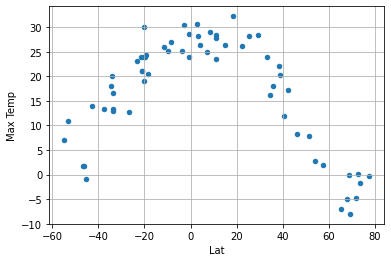

In [36]:
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"
plt.savefig = "../output_data/Latitude vs Max Temp.png"
plt.show()

## Latitude vs. Humidity Plot

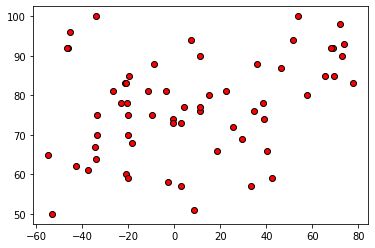

In [39]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker = "o", facecolors = "red", edgecolors = "black")
# plt.ylim(-60, 80)
# plt.ylim(-10, 35)
plt.title = "Latitude vs Humidity"
# plt.xlabel = "Latitude"
# plt.ylabel ="Humidity"
plt.savefig = "../output_data/Latitude vs Humidity.png"
plt.show()

## Latitude vs. Cloudiness Plot

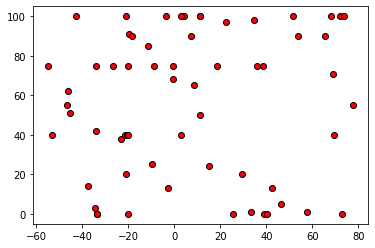

In [43]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Cloudiness"
plt.savefig = "../output_data/Latitude vs Cloudiness.png"
plt.show() 

## Latitude vs. Wind Speed Plot

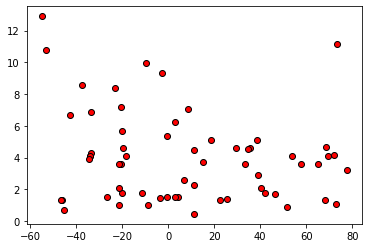

In [44]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker = "o", facecolors = "red", edgecolors = "black")
plt.savefig = "../output_data/Latitude vs Wind Speed.png"
plt.show()

## Linear Regression

In [45]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace = False)

north_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,mitsamiouli,-11.38,43.28,25.99,81,85,1.75,KM,1602695371
5,cap malheureux,-19.98,57.61,23.89,75,0,1.79,MU,1602695373
9,rikitea,-23.12,-134.97,23.2,78,38,8.41,PF,1602695374
10,hithadhoo,-0.6,73.08,28.52,74,68,5.38,MV,1602695374
11,mataura,-46.19,168.86,1.67,92,62,1.34,NZ,1602695374
12,esperance,-33.87,121.9,13,100,75,4.1,AU,1602695375
14,new norfolk,-42.78,147.06,14,62,100,6.7,AU,1602695375
18,denpasar,-8.65,115.22,27,88,75,1,ID,1602695146
21,atuona,-9.8,-139.03,25.2,75,25,9.96,PF,1602695377
27,puerto ayora,-0.74,-90.35,24,73,75,1.5,EC,1602695379


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

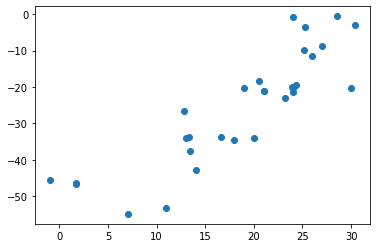

In [46]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace= False)

x_values = north_city_data["Max Temp"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

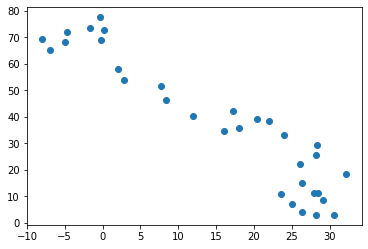

In [47]:
south_index = clean_city_data[clean_city_data["Lat"] < 0].index
south_city_data = clean_city_data.drop(south_index, inplace = False)

x_values = south_city_data["Max Temp"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

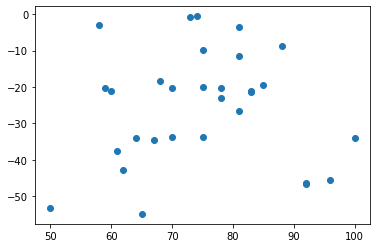

In [48]:
x_values = north_city_data["Humidity"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

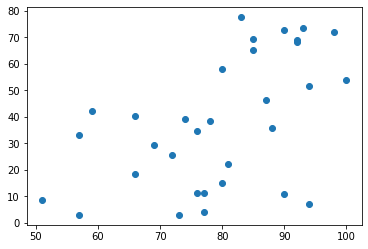

In [49]:
x_values = south_city_data["Humidity"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

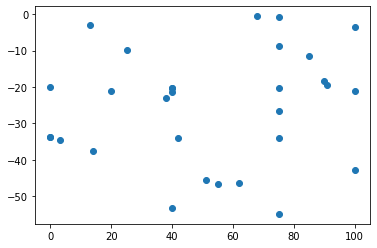

In [50]:
x_values = north_city_data["Cloudiness"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Cloudiness (%)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

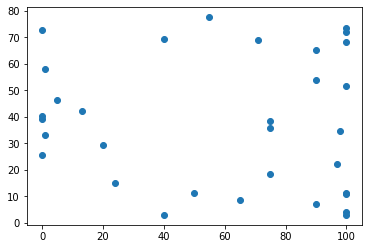

In [51]:
x_values = south_city_data["Cloudiness"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Cloudiness vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

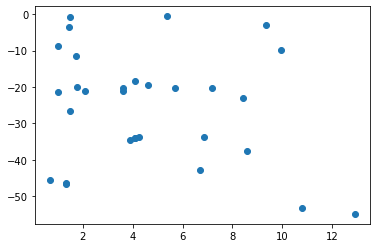

In [52]:
x_values = north_city_data["Wind Speed"]
y_values = north_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Wind Speed (mph)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

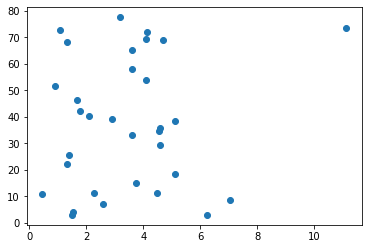

In [53]:
x_values = south_city_data["Wind Speed"]
y_values = south_city_data["Lat"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
plt.xlabel = "Wind Speed"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (South Hemisphere)"
plt.show()